/home/docker/packages/tvb-root/tvb_contrib/tvb/contrib/scripts/utils/data_structures_utils.py:722: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (transpose is "horizontal" or "row" and shape[0] > shape[1]) or \
/home/docker/packages/tvb-root/tvb_contrib/tvb/contrib/scripts/utils/data_structures_utils.py:723: SyntaxWarning: "is" with a literal. Did you mean "=="?
  (transpose is "vertical" or "column" and shape[0] < shape[1]):


2022-11-29 14:20:02,385 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-11-29 14:20:02,385 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-11-29 14:20:02,392 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-11-29 14:20:02,392 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-11-29 14:20:02,398 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-11-29 14:20:02,398 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-11-29 14:20:02,403 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-11-29 14:20:02,403 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-11-29 14:20:02,411 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/working_files/outputs/tvb_nest_rs
Config (
  title .............................. 'Config gid: 8fd3b058-caf4-4fb4-bbf7-97654b01453d'
  Type ............................... 'Config'
  gid ................................ UUID('8fd3b058-caf4-4fb4-bbf7-97654b01453d')
  config.gid ......................... UUID('8fd3b058-caf4-4fb4-bbf7-97654b01453d')
  config.title ....................... 'Config gid: 8fd3b058-caf4-4fb4-bbf7-97654b01453d'
  config.log ......................... <Logger tvb_multiscale.tvb_nest.config (DEBUG)>
  config.out ......................... OutputConfig gid: 9bbb2e6f-3416-4183-a336-1a4739a8d727
  config.figures ..................... FiguresConfig
  config.DEFAULT_SUBJECT[connectivity]  Connectivity gid: 6702bf56-da8a-427a-9876-4c70eaa84d32
  config.DEFAULT_SUBJECT[cortex] ..... Cortex gid: 502c3384-4788-4526-918e-430896fe484f
  config.DEFAULT_SUBJECT_PATH ........ '/home/docker/

Normalizing connectivity weights with 99 percentile!
Configuring model with parameters:
OrderedDict([('G', 1.0), ('STIMULUS', 0.1), ('I_e', -0.35), ('I_s', 0.08), ('w_ie', -3.0), ('w_rs', -2.0)])
Fixing thalamocortical weights!
Fixing thalamocortical delays!
Applying FIC for parameter I_e: G * FIC * FIC_SPLIT = 1 * 1 * 0.25 = 0.25!


/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:294: UserWarning: 
  warnings.warn(str(e))


<Figure size 432x288 with 0 Axes>

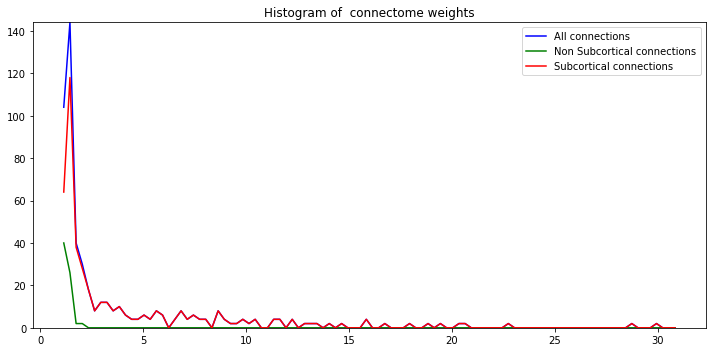

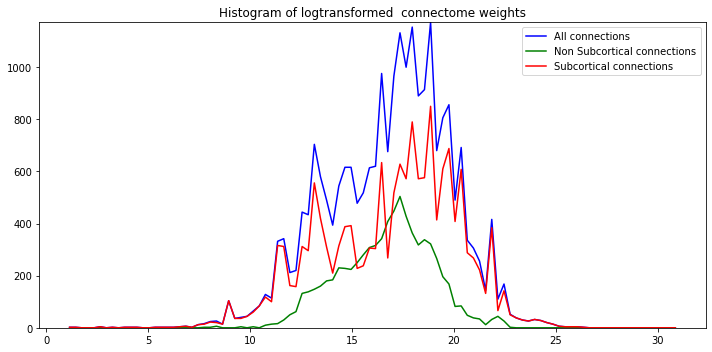

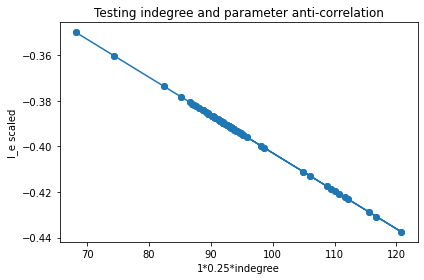

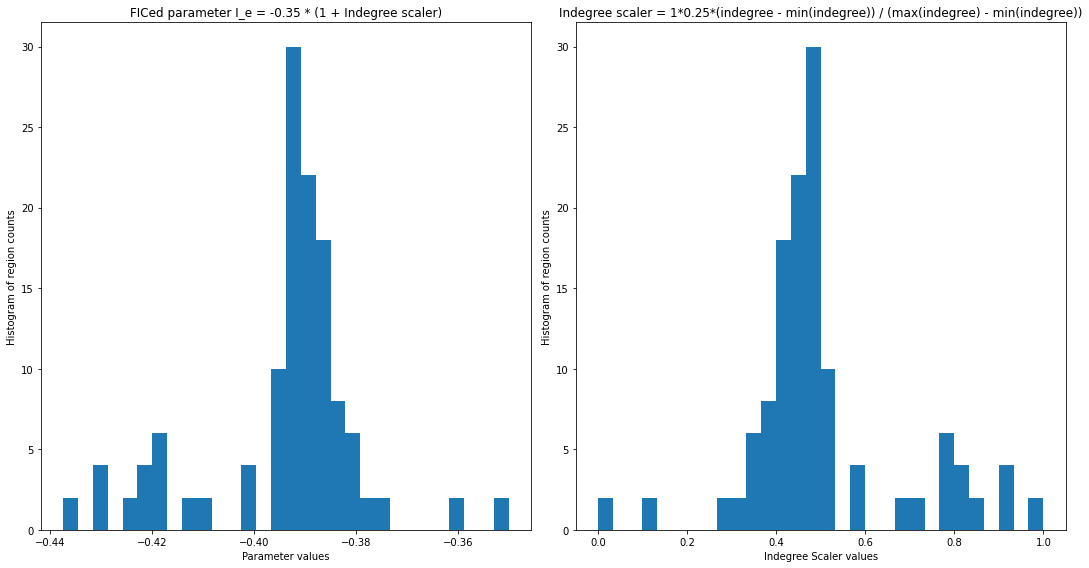

Applying FIC for parameter w_ie: G * FIC * (1.0-FIC_SPLIT) = 1 * 1 * 0.75 = 0.75!


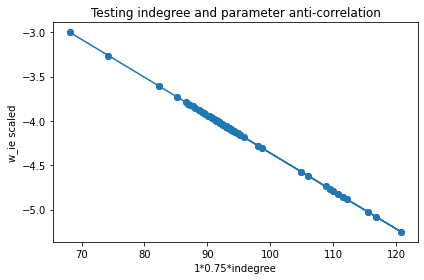

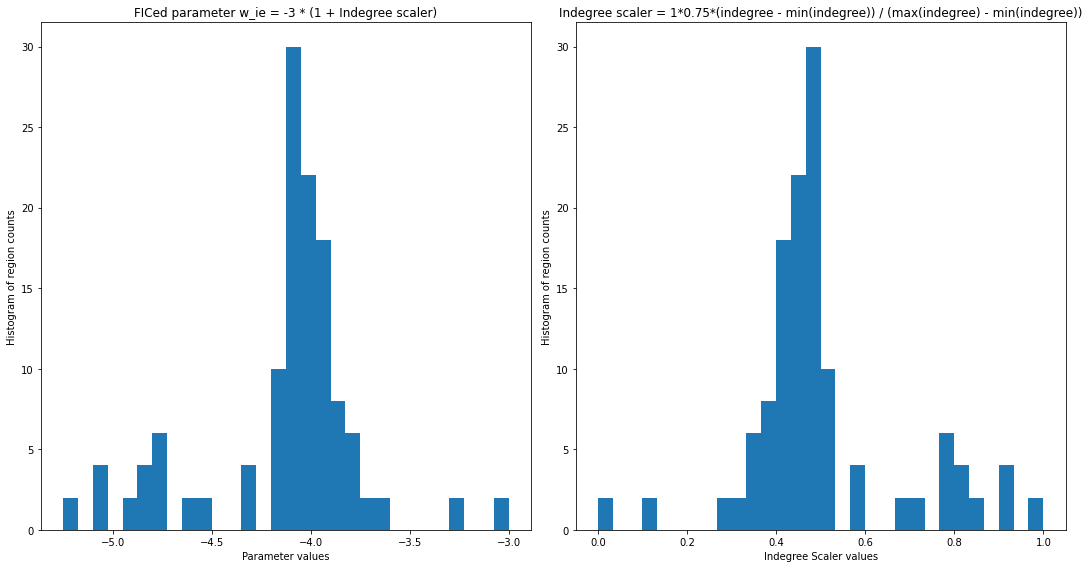

2022-11-29 14:20:07,529 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


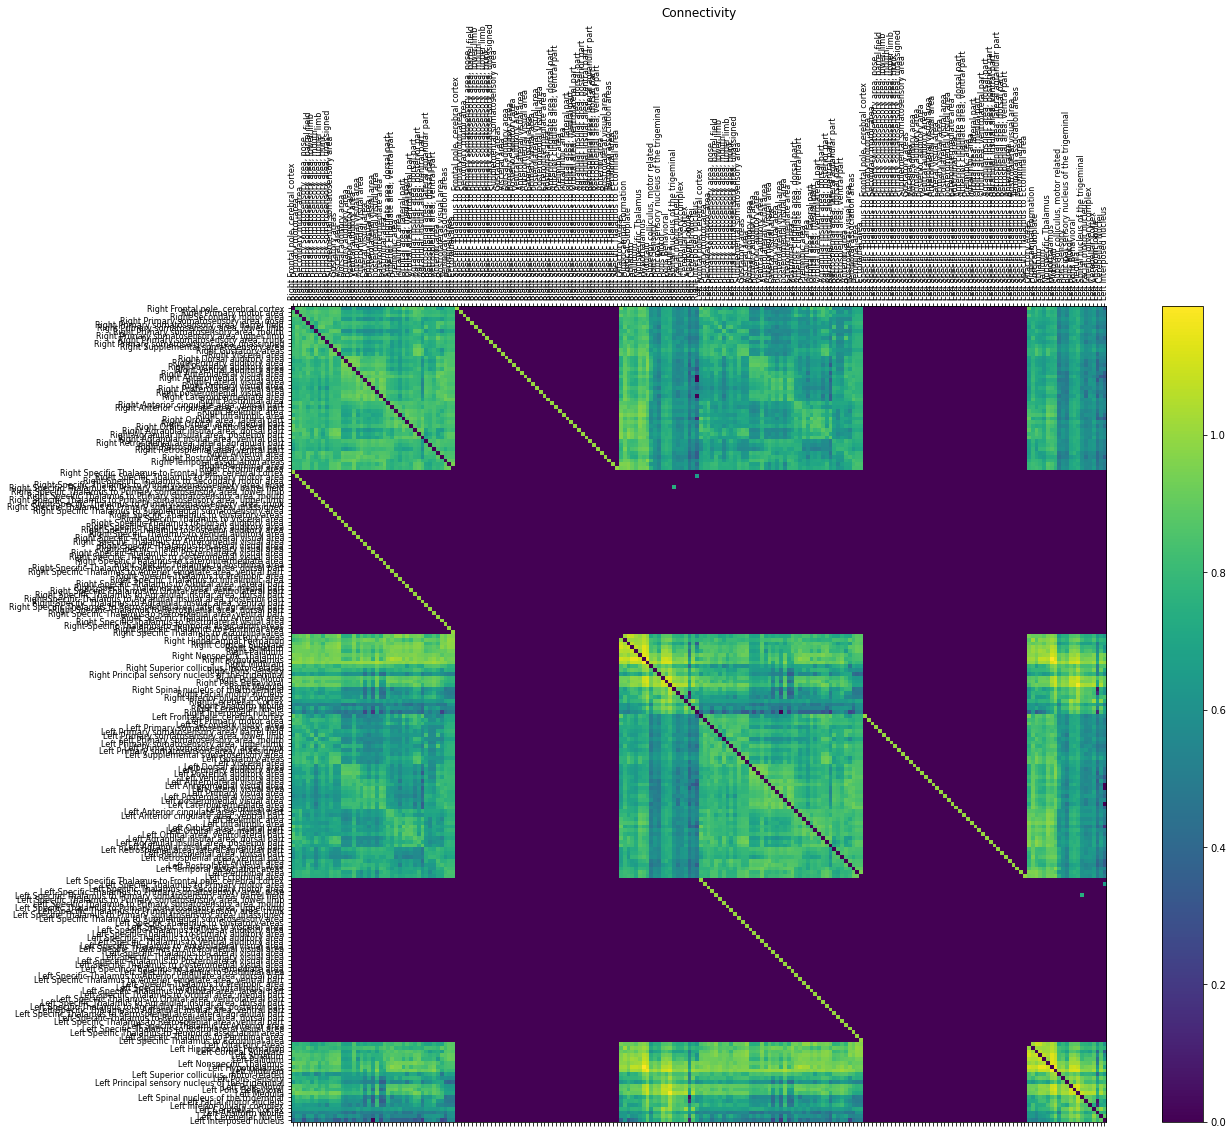

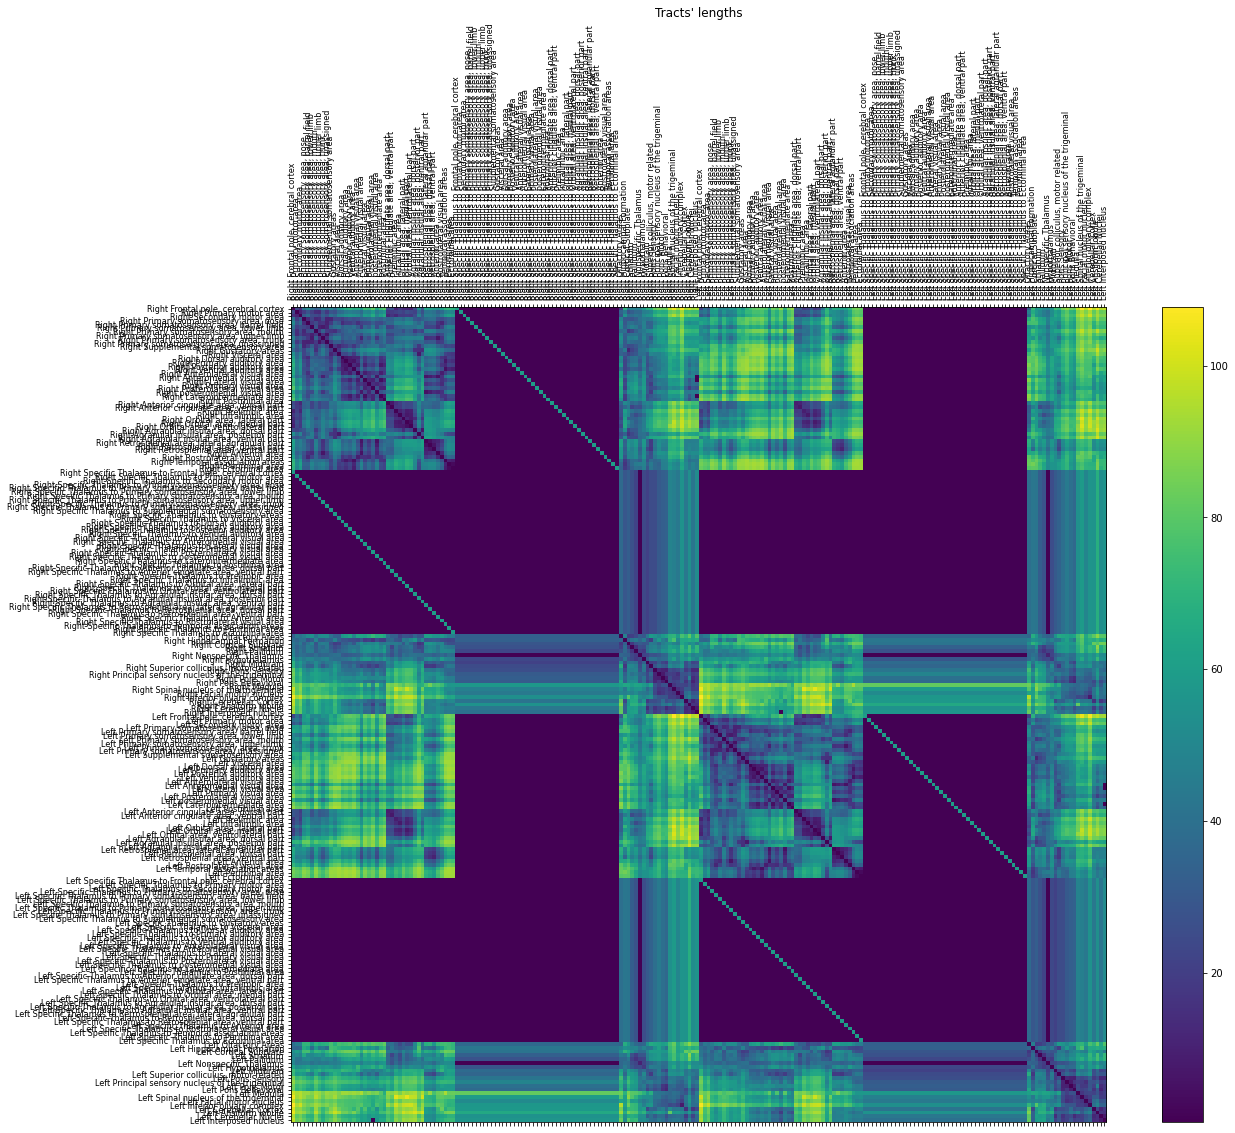

In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *

from examples.tvb_nest.notebooks.cerebellum.scripts.base import DEFAULT_ARGS

# Code repeating what is done in scripts.tvb_nest_script.run_tvb_nest_workflow() function:

# Inputs to run_tvb_nest_workflow()
PSD_target = None
model_params = {} # outputs/cwc_FIC_I_e_w_ie/code
config = None
write_files = True
config_args = {"output_folder": "tvb_nest_rs"}

plot_flag = config_args.get('plot_flag', DEFAULT_ARGS.get('plot_flag'))
config, plotter = assert_config(config, return_plotter=True, **config_args)
config.model_params.update(model_params)
if config.VERBOSE:
    print("\n\n------------------------------------------------\n\n"+
          "Running TVB-NEST workflow for plot_flag=%s, write_files=%s,\nand model_params=\n%s...\n" 
          % (str(plot_flag), str(write_files), str(config.model_params)))
# config.SIMULATION_LENGTH = 100.0

# Load and prepare connectome and connectivity with all possible normalizations:
connectome, major_structs_labels, voxel_count, inds, maps = prepare_connectome(config, plotter=plotter)
connectivity = build_connectivity(connectome, inds, config)

# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)

# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, plotter=plotter)


In [2]:
simulator.model.G[0].item()

0.0078125

In [3]:
# Build NEST network
nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@c545255f7
 Built: May 18 2022 09:50:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

FAILED! Needing to compile it first!
Compiling cereb module...



-------------------------------------------------------
cerebmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -std=c++11 -O2 -Wall -fopenmp  -fdiagnostics-color=auto
NEST include dirs    :  -I/home/docker/env/neurosci/nest_build/include/nest -I/usr/include -I/usr/include -I/usr/include -I/usr/include
NEST libraries flags : -L/home/docker/env/neurosci/nest_build/lib/nest -lnestutil -lnest -lsli -lnestkernel -fopenmp /usr/lib/x86_64-linux-gnu/libltdl.so /usr/lib/x86_64-linux-gnu/libreadline.so /usr/lib/x86_64-linux-gnu/libncurses.so /usr/lib/x86_64-linux-gnu/libgsl.so /usr/lib/x86_64-linux-gnu/libgslcblas.so   /usr/lib/libmpicxx.so /usr/lib/libmpi.so

-------------------------------------------------------

You can now build and install 'cerebmodule' using
  make
  make install

The library file libcerebmodule.so will be installed to
  /home

(b'-- Configuring done\n-- Generating done\n-- Build files have been written to: /home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb/build\nScanning dependencies of target cerebmodule_module\n[ 16%] Building CXX object CMakeFiles/cerebmodule_module.dir/cerebmodule.o\n[ 33%] Building CXX object CMakeFiles/cerebmodule_module.dir/eglif_cond_alpha_multisyn.o\n[ 50%] Linking CXX shared module cerebmodule.so\n[ 50%] Built target cerebmodule_module\nScanning dependencies of target cerebmodule_lib\n[ 66%] Building CXX object CMakeFiles/cerebmodule_lib.dir/cerebmodule.o\n[ 83%] Building CXX object CMakeFiles/cerebmodule_lib.dir/eglif_cond_alpha_multisyn.o\n[100%] Linking CXX shared library libcerebmodule.so\n[100%] Built target cerebmodule_lib\n[ 50%] Built target cerebmodule_module\n[100%] Built target cerebmodule_lib\nInstall the project...\n-- Install configuration: ""\n-- Installing: /home/docker/env/neurosci/nest_build/cerebmodule.so\n', None)
Installing cereb m

In [4]:
#nest.Install('cerebmodule')

In [5]:
# pwd=os.getcwd()
# import nest
# import subprocess
# cereb_path = '/home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb'
# os.chdir(os.path.join(cereb_path, 'build'))
# p = subprocess.Popen("cmake -Dwith-nest=/home/docker/env/neurosci/nest_build/bin/nest-config ..; make; make install",
#                              stdout=subprocess.PIPE, shell=True)
# print(p.communicate())

# nest.Install('cerebmodule')
# os.chdir(pwd)

In [6]:
#before running the below code, make sure that you locally add the file here: 
# /home/docker/packages/tvb-multiscale/examples/data/cerebellum/balanced_DCN_IO.hdf5
# nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)

In [7]:
# nest_network.nest_instance.Simulate(config.SIMULATION_LENGTH)

# nest_network = simulate_nest_network(nest_network, config, neuron_models, neuron_number, plot_flag=True)


In [8]:
# Build TVB-NEST interfaces
simulator, nest_network = build_tvb_nest_interfaces(simulator, nest_network, nest_nodes_inds, config)


2022-11-29 14:21:38,703 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-11-29 14:21:38,703 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-11-29 14:21:38,717 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['granule_cell']->['E'] created!
2022-11-29 14:21:38,717 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for ['granule_cell']->['E'] created!
2022-11-29 14:21:52,488 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_re

In [9]:
# Confirming that we got our special coupling for the TVB->NEST interface CosimCouplingMonitor:
simulator.cosim_monitors[0].coupling


In [10]:
# Simulate TVB-NEST model
results, transient, simulator, nest_network = simulate_tvb_nest(simulator, nest_network, config)


Simulating TVB-NEST...
2022-11-29 14:22:19,722 - ERROR - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Bad Simulator.integrator.noise.nsig shape: (2, 1, 1)
2022-11-29 14:22:19,742 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
...0.166% completed in 11.1117 sec!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 1 last spike(s) of the input spiketrain


...0.189% completed in 12.6104 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 12 last spike(s) of the input spiketrain


...0.200% completed in 13.3601 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 7 last spike(s) of the input spiketrain


...0.222% completed in 14.8525 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 21 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 2 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 50 last spike(s) of the input spiketrain


...0.233% completed in 15.5935 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 13 last spike(s) of the input spiketrain


...0.244% completed in 16.3818 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 26 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 59 last spike(s) of the input spiketrain


...0.255% completed in 17.1399 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 27 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 39 last spike(s) of the input spiketrain


...0.266% completed in 17.8996 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 6 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 5 last spike(s) of the input spiketrain


...0.277% completed in 18.6557 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 29 last spike(s) of the input spiketrain


...0.288% completed in 19.4734 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 8 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 30 last spike(s) of the input spiketrain


...0.300% completed in 20.2332 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 28 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 3 last spike(s) of the input spiketrain


...0.311% completed in 20.9904 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 22 last spike(s) of the input spiketrain


...0.333% completed in 22.5045 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 9 last spike(s) of the input spiketrain


...0.344% completed in 23.2655 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 10 last spike(s) of the input spiketrain


...0.355% completed in 24.122 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 19 last spike(s) of the input spiketrain


...0.366% completed in 24.8648 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 16 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 17 last spike(s) of the input spiketrain


...0.388% completed in 26.4495 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 11 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 14 last spike(s) of the input spiketrain


...0.433% completed in 29.4614 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 31 last spike(s) of the input spiketrain


...0.455% completed in 31.0035 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 4 last spike(s) of the input spiketrain


...0.477% completed in 32.5138 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 15 last spike(s) of the input spiketrain


...0.510% completed in 34.7511 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 23 last spike(s) of the input spiketrain


...0.555% completed in 37.7079 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 18 last spike(s) of the input spiketrain


...0.888% completed in 60.2317 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 20 last spike(s) of the input spiketrain


...2.130% completed in 144.311 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 25 last spike(s) of the input spiketrain


...2.164% completed in 146.681 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 24 last spike(s) of the input spiketrain


...3.739% completed in 259.218 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 34 last spike(s) of the input spiketrain


...3.761% completed in 260.839 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 32 last spike(s) of the input spiketrain


...12.682% completed in 995.493 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 33 last spike(s) of the input spiketrain


...12.715% completed in 998.765 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 36 last spike(s) of the input spiketrain


...13.425% completed in 1064.15 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 42 last spike(s) of the input spiketrain


...13.614% completed in 1081.38 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 38 last spike(s) of the input spiketrain


...13.625% completed in 1082.39 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 53 last spike(s) of the input spiketrain


...48.119% completed in 3641.06 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 35 last spike(s) of the input spiketrain


...50.738% completed in 3810.87 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 37 last spike(s) of the input spiketrain


...84.567% completed in 5974.93 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 47 last spike(s) of the input spiketrain


...84.589% completed in 5976.96 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 48 last spike(s) of the input spiketrain


...100.000% completed in 6949.03 sec!
Simulated in 6976.861057 secs!


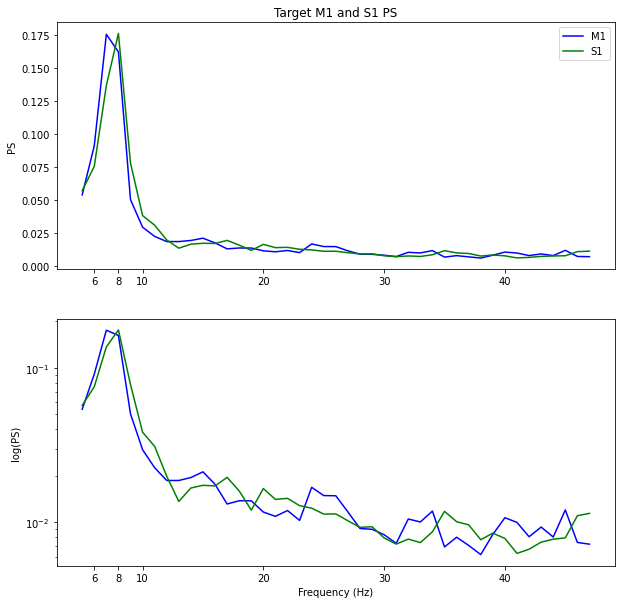

In [11]:
if PSD_target is None:
    # This is the PSD target we are trying to fit...
    if config.model_params['G']:
            # ...for a connected brain, i.e., PS of bilateral M1 and S1:
        PSD_target = compute_target_PSDs_m1s1brl(config, write_files=True, plotter=plotter)
    else:
        # ...for a disconnected brain, average PS of all regions:
        PSD_target = compute_target_PSDs_1D(config, write_files=True, plotter=plotter)

/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:716: UserWarning:H5Writer cannot be imported! Probably you haven't installed tvb_framework.


Pickle-dumping source_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/working_files/outputs/tvb_nest_rs/res/source_ts.pkl!
[   0. 1024. 2048. 3072. 4096. 5120. 6144. 7168. 8192.]
[[[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 ...


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]


 [[[nan]
   [nan]
   [nan]
   ...
   [nan]
   [nan]
   [nan]]]]
Pickle-dumping bold_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/working_files/outputs/tvb_nest_rs/res/bold_ts.pkl!


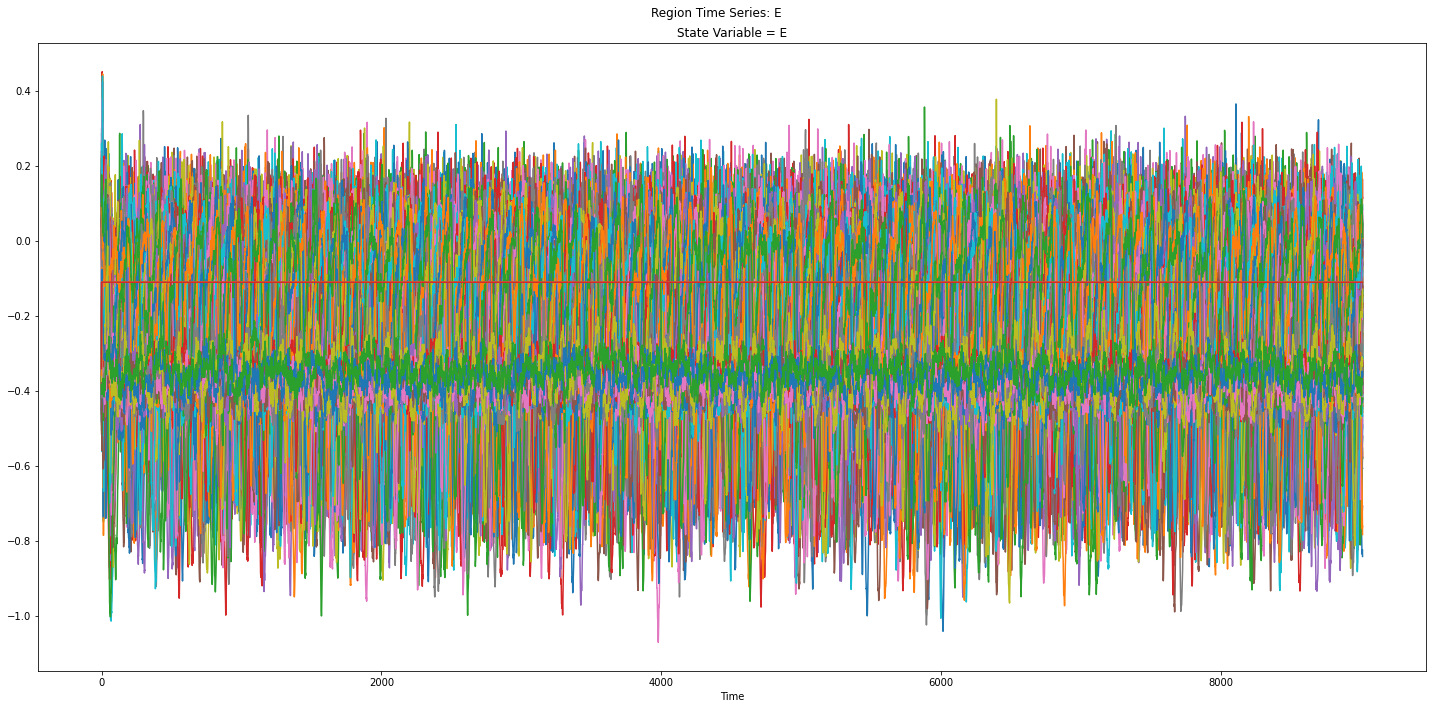

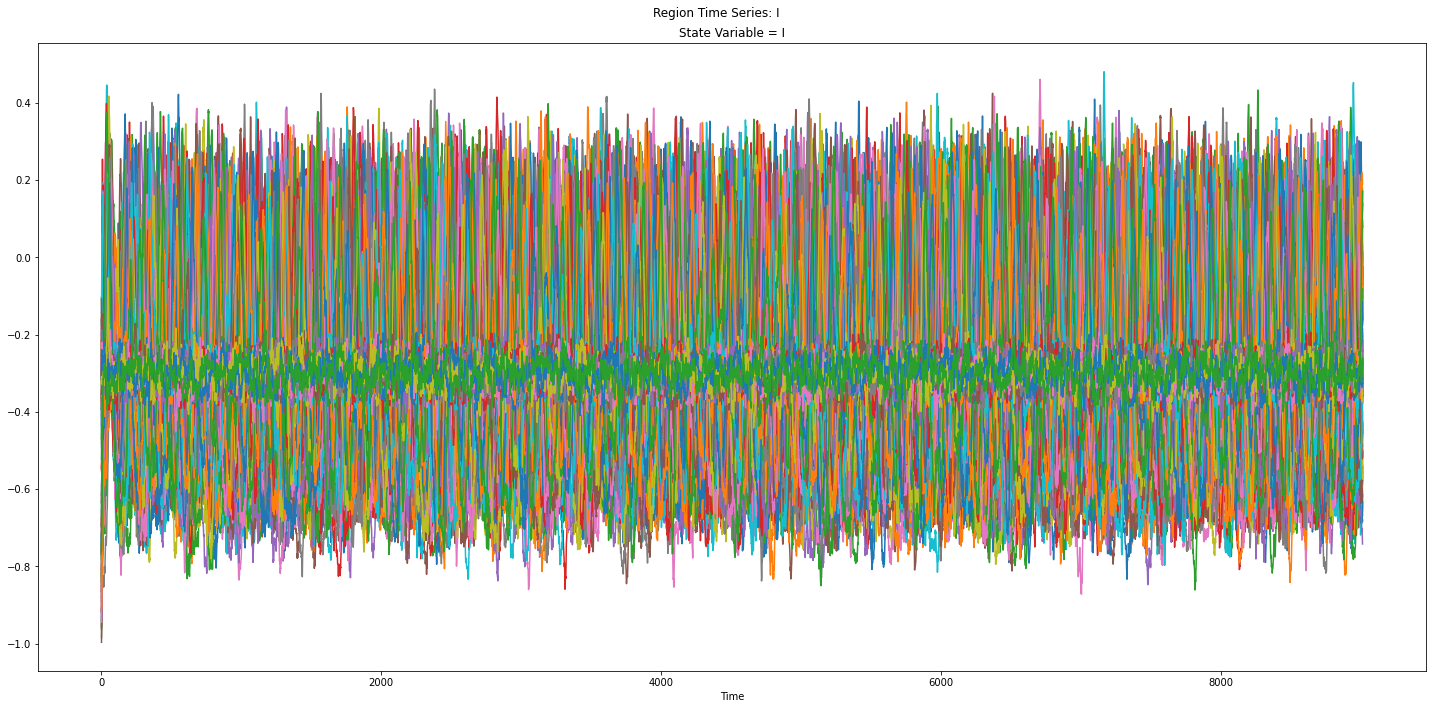

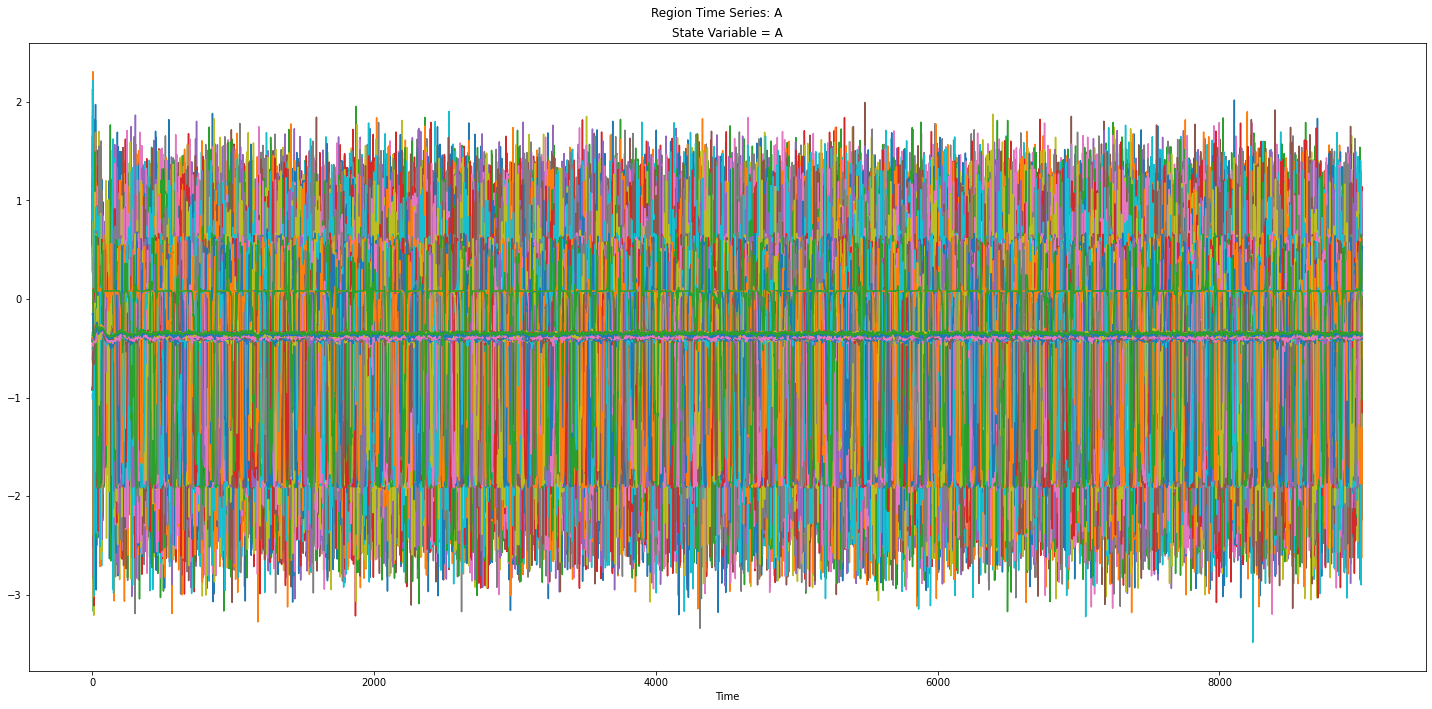

2022-11-29 16:18:36,616 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:36,619 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-29 16:18:36,635 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:36,636 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


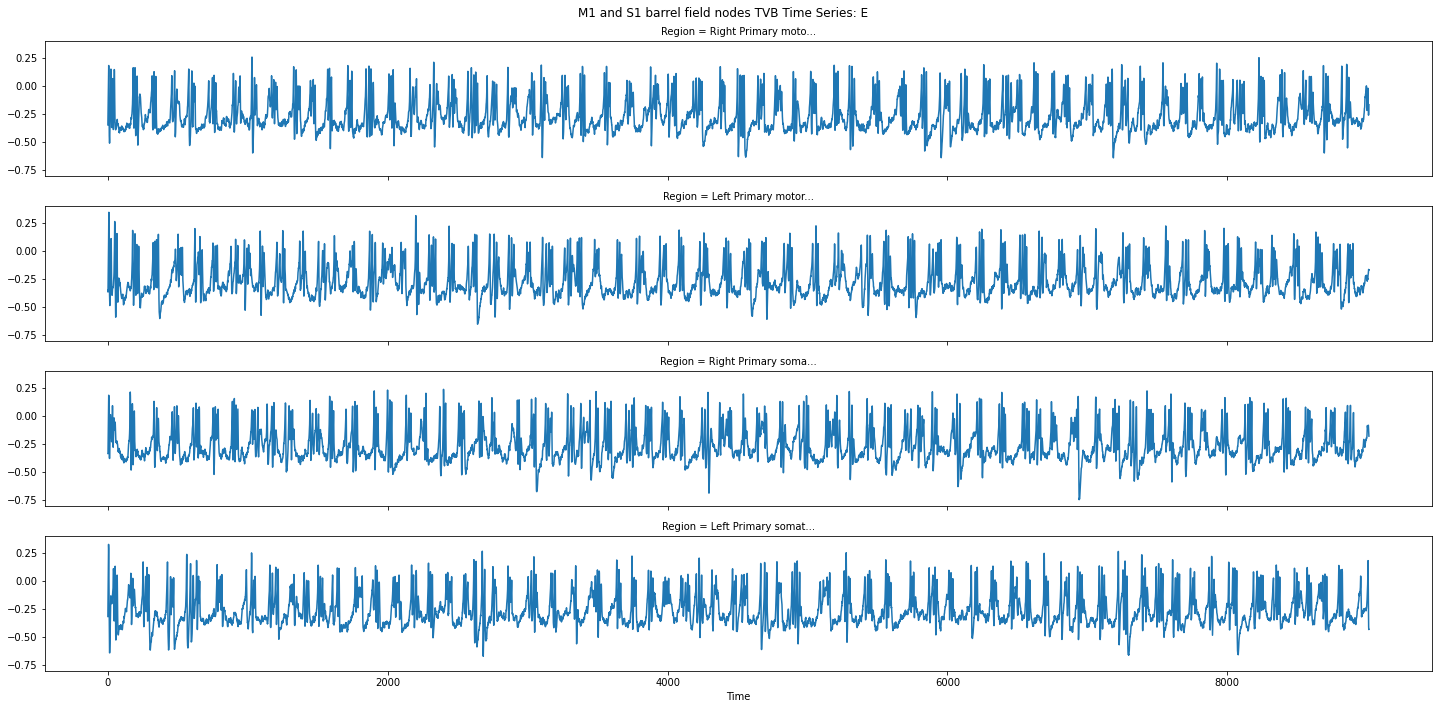

2022-11-29 16:18:37,553 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:37,555 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


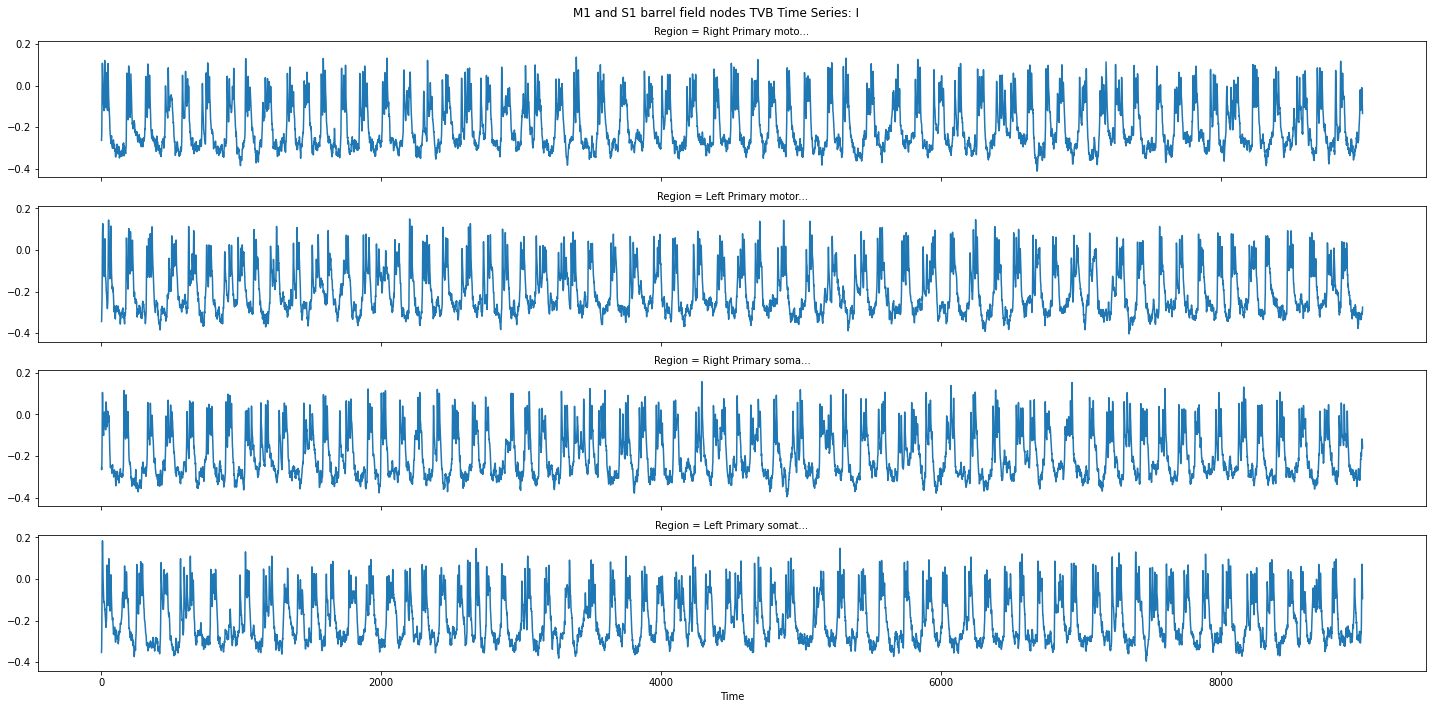

2022-11-29 16:18:38,409 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:38,411 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


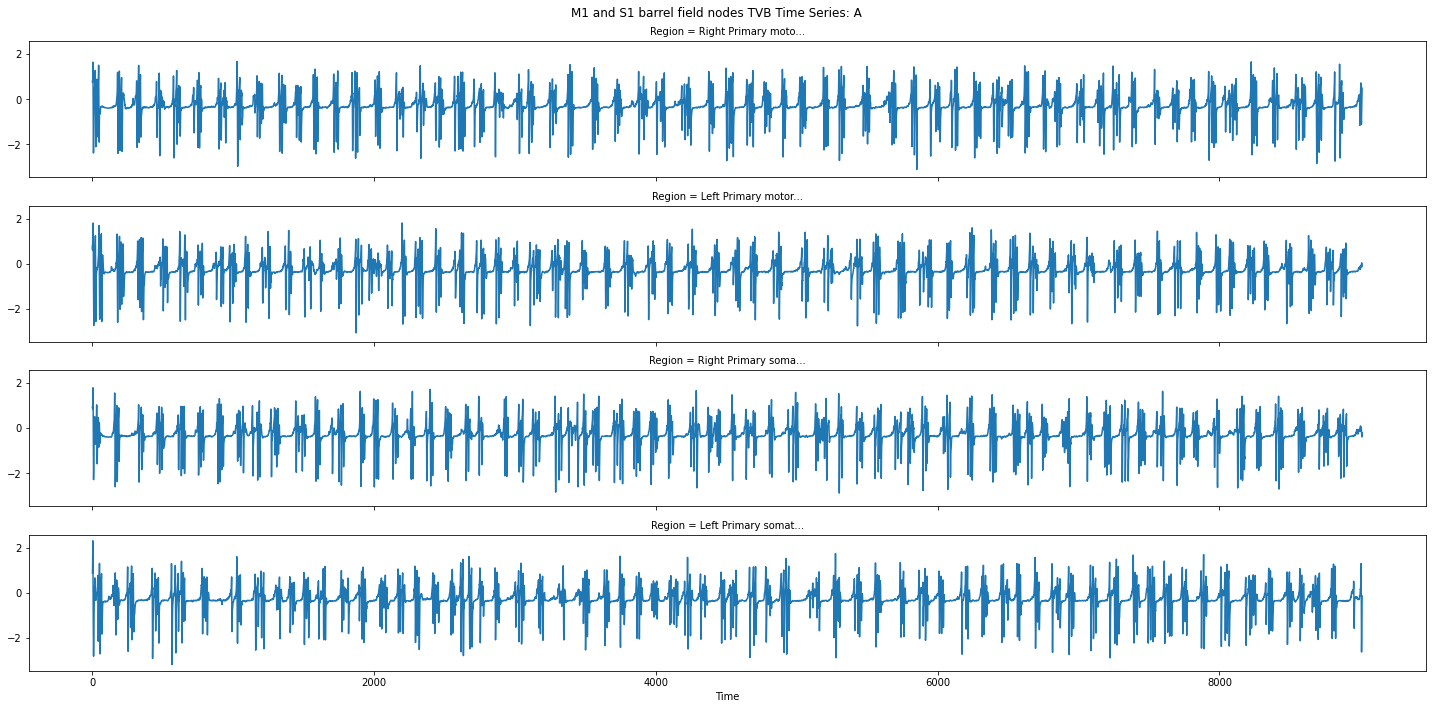

2022-11-29 16:18:39,219 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:39,221 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-29 16:18:39,234 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:39,234 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


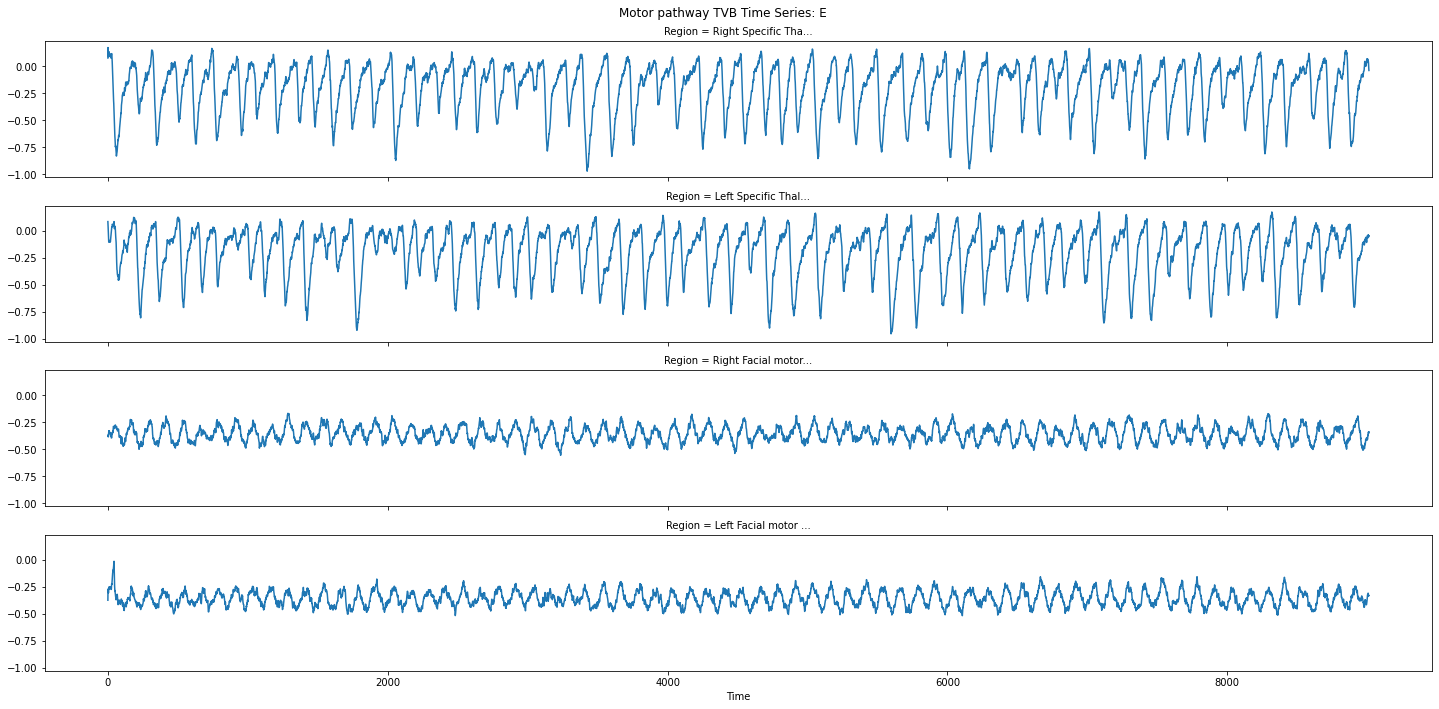

2022-11-29 16:18:40,018 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:40,019 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


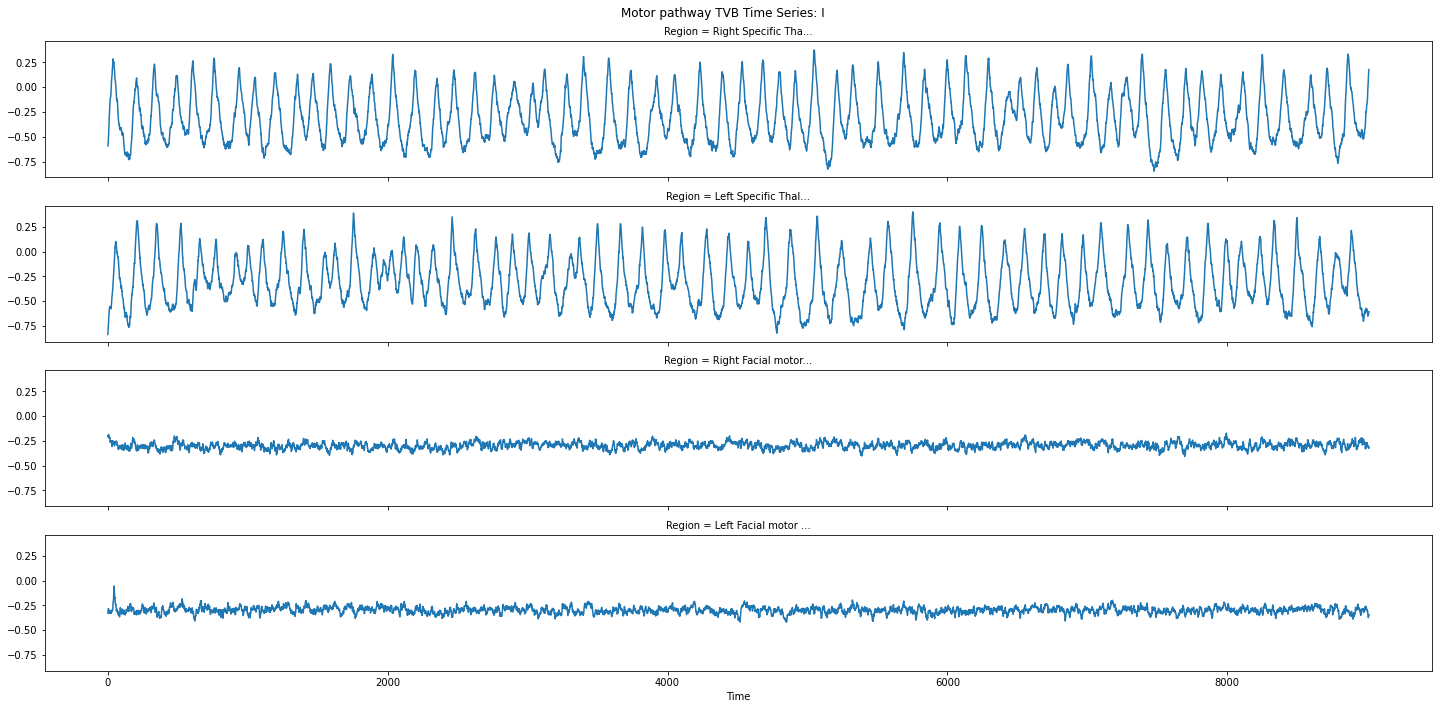

2022-11-29 16:18:40,824 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:40,824 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


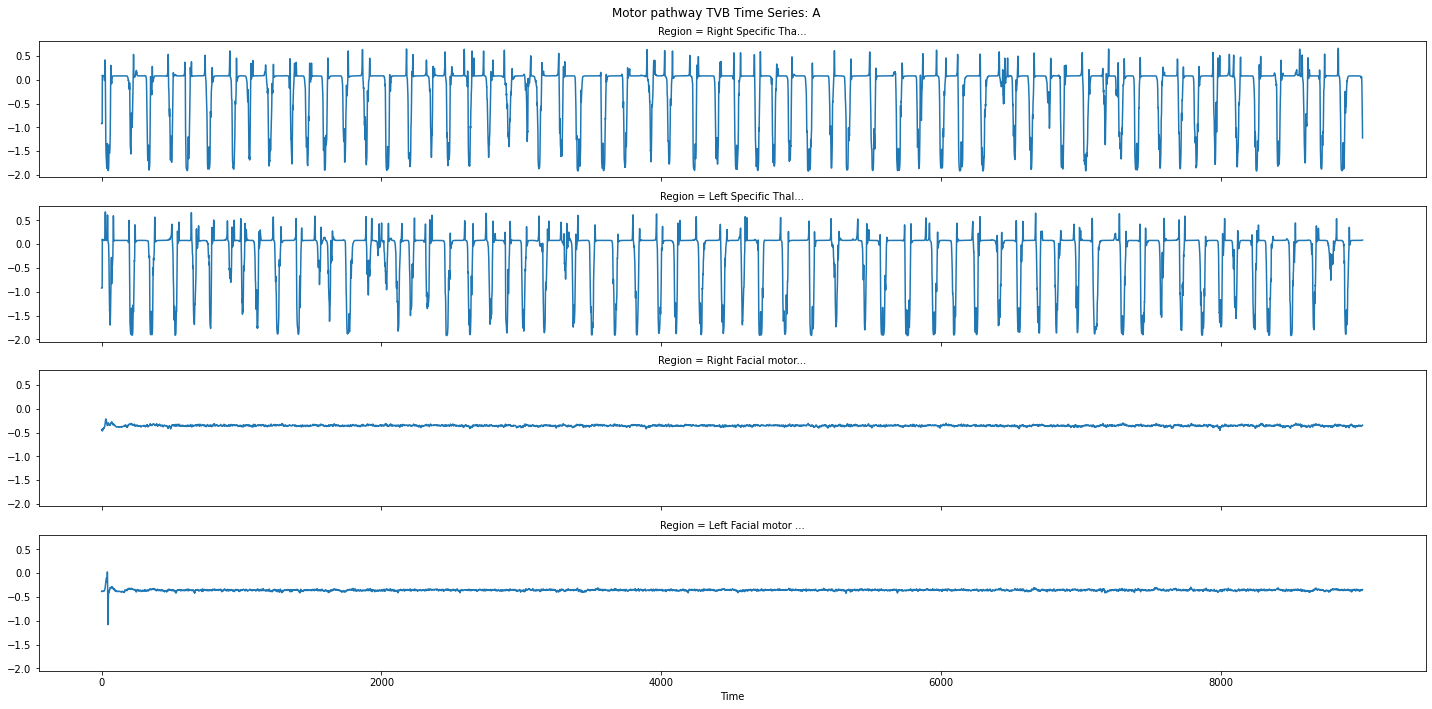

2022-11-29 16:18:41,601 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:41,602 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-11-29 16:18:41,615 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:41,616 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


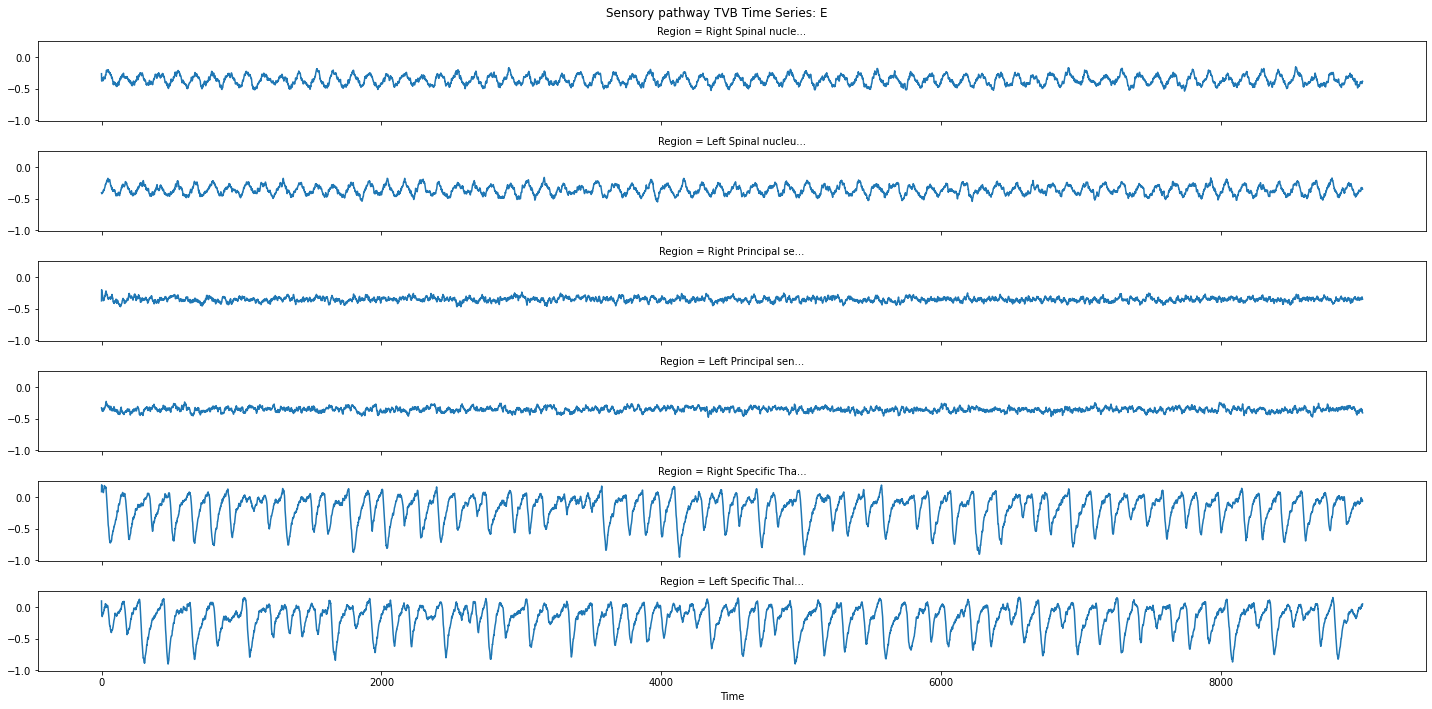

2022-11-29 16:18:42,649 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:42,649 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


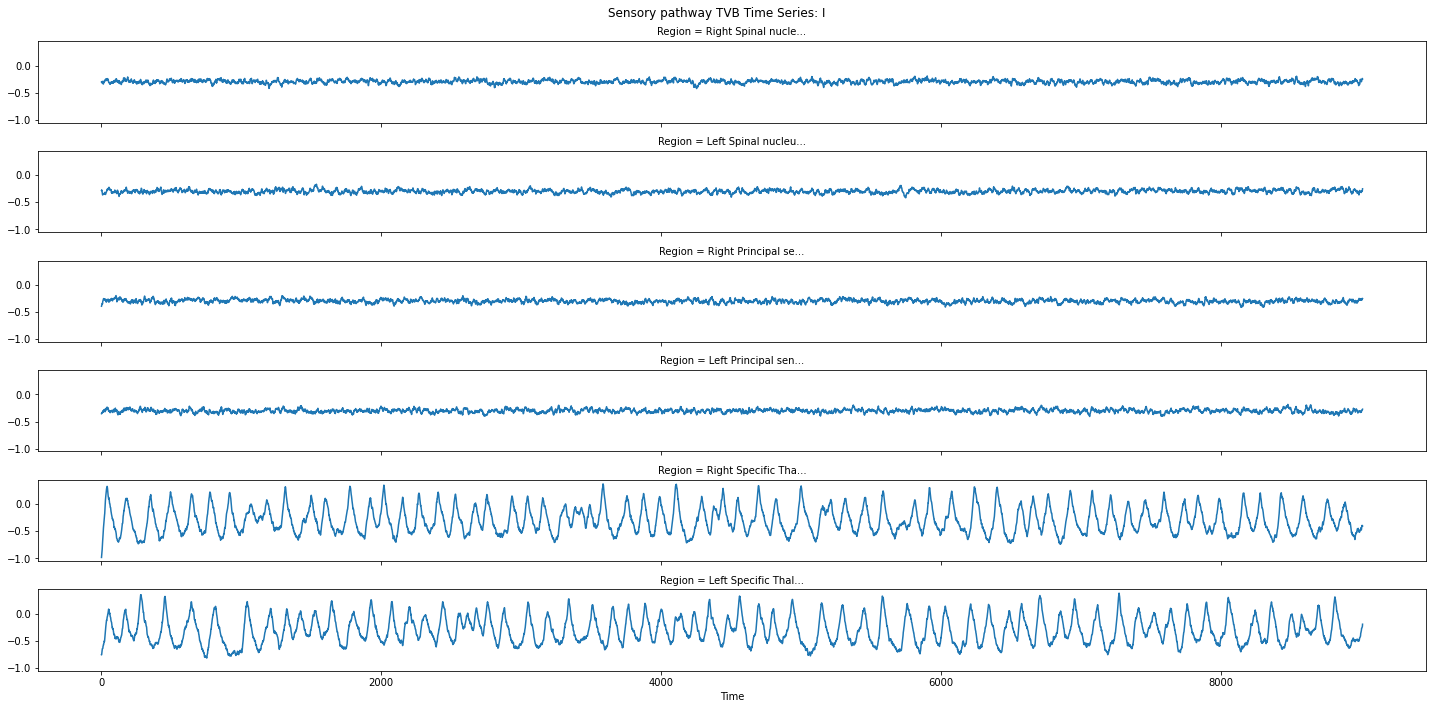

2022-11-29 16:18:43,863 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:43,864 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


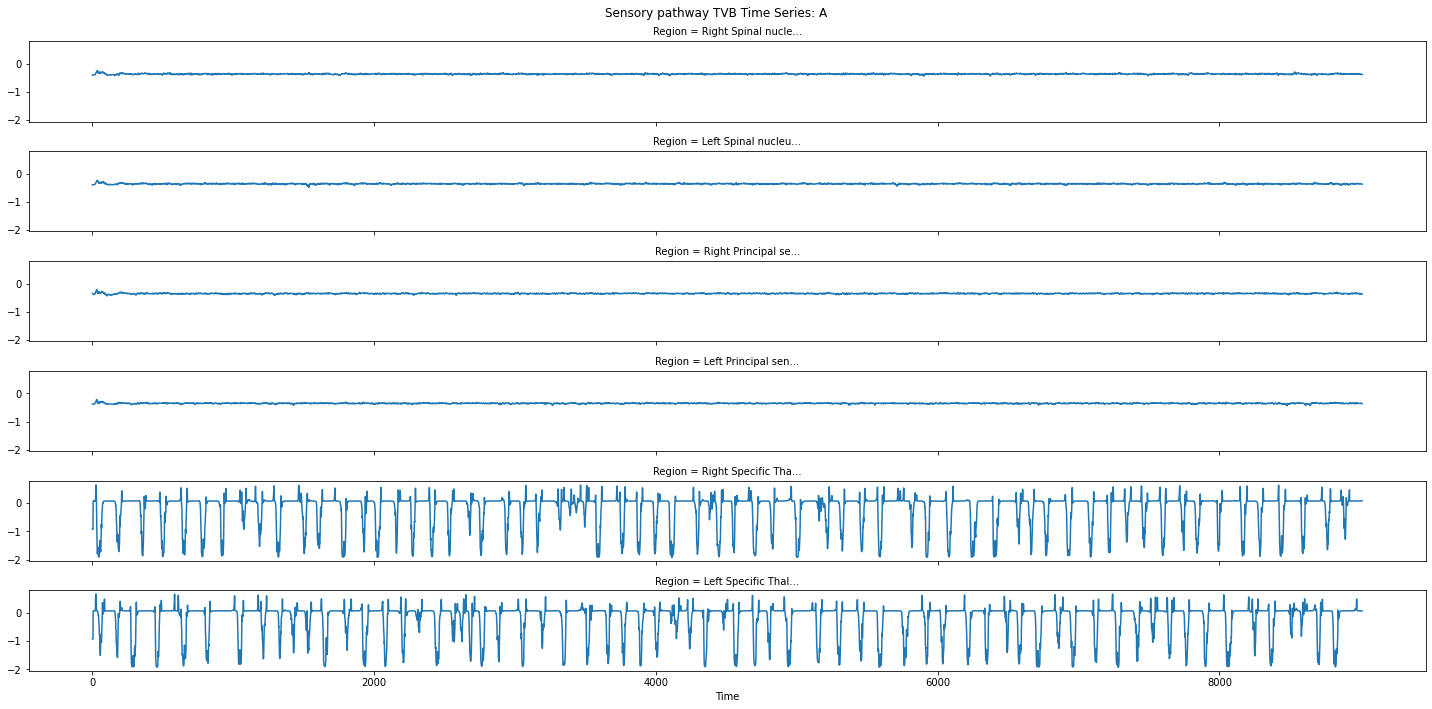

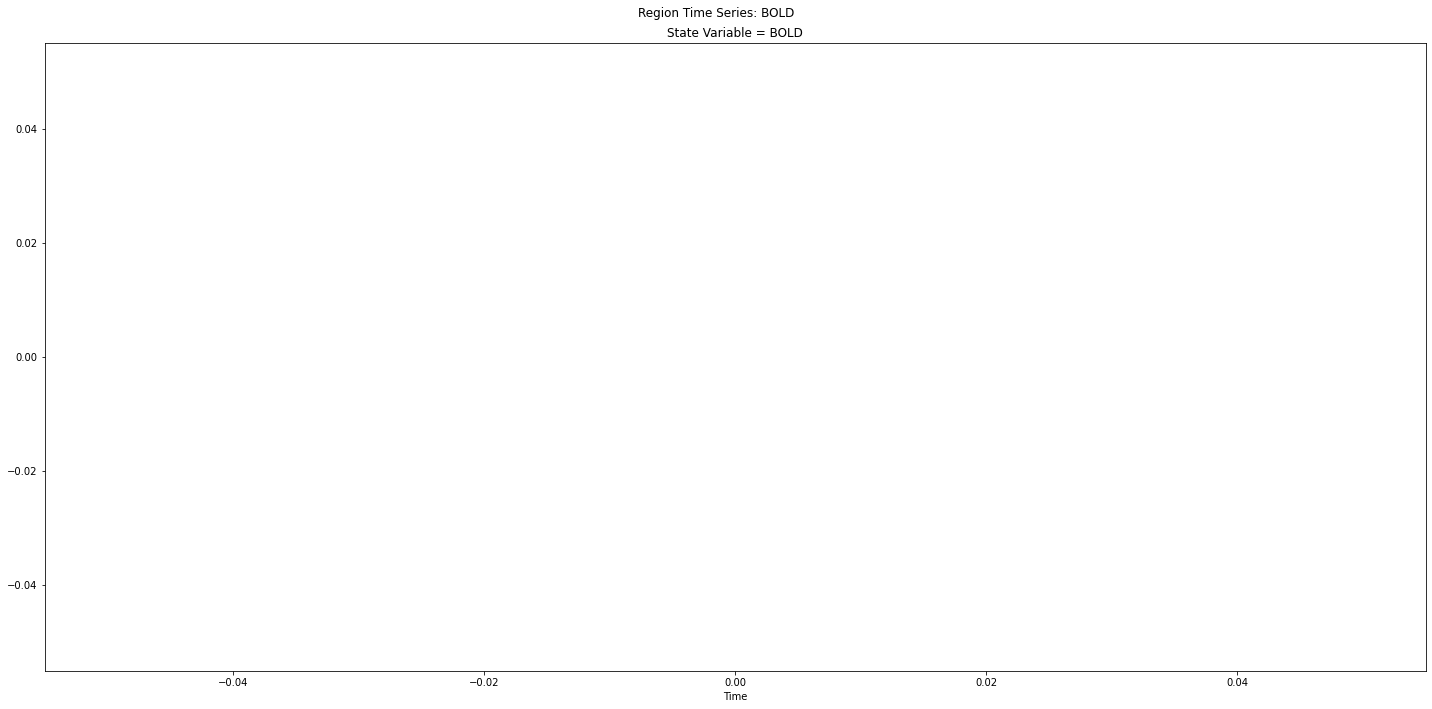

2022-11-29 16:18:45,448 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:45,450 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


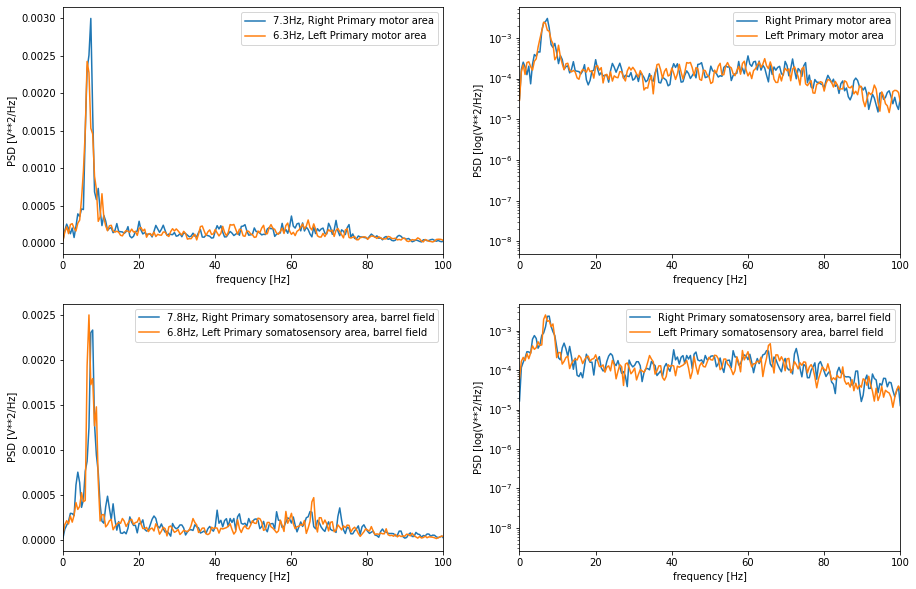

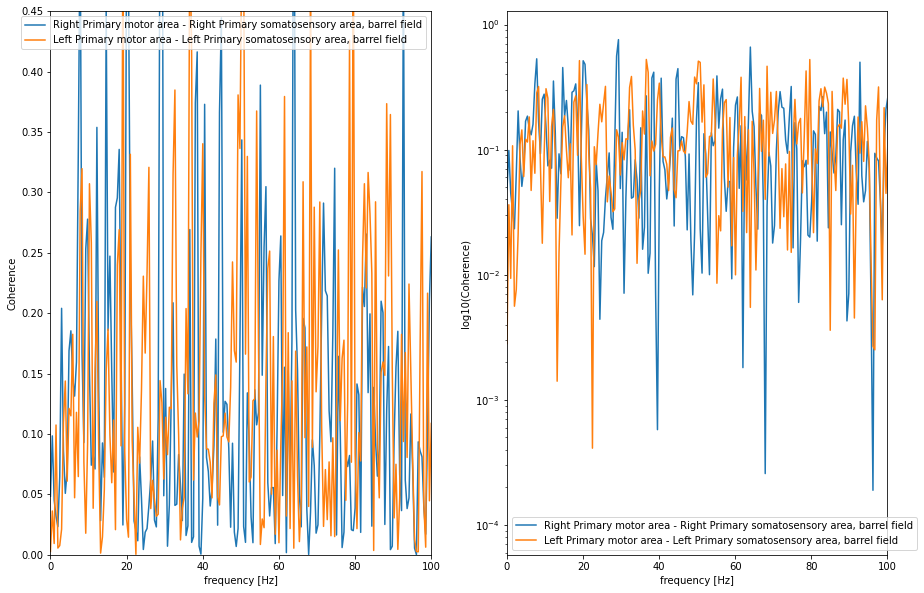

2022-11-29 16:18:47,959 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - 'NoneType' object is not subscriptable
2022-11-29 16:18:47,960 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!


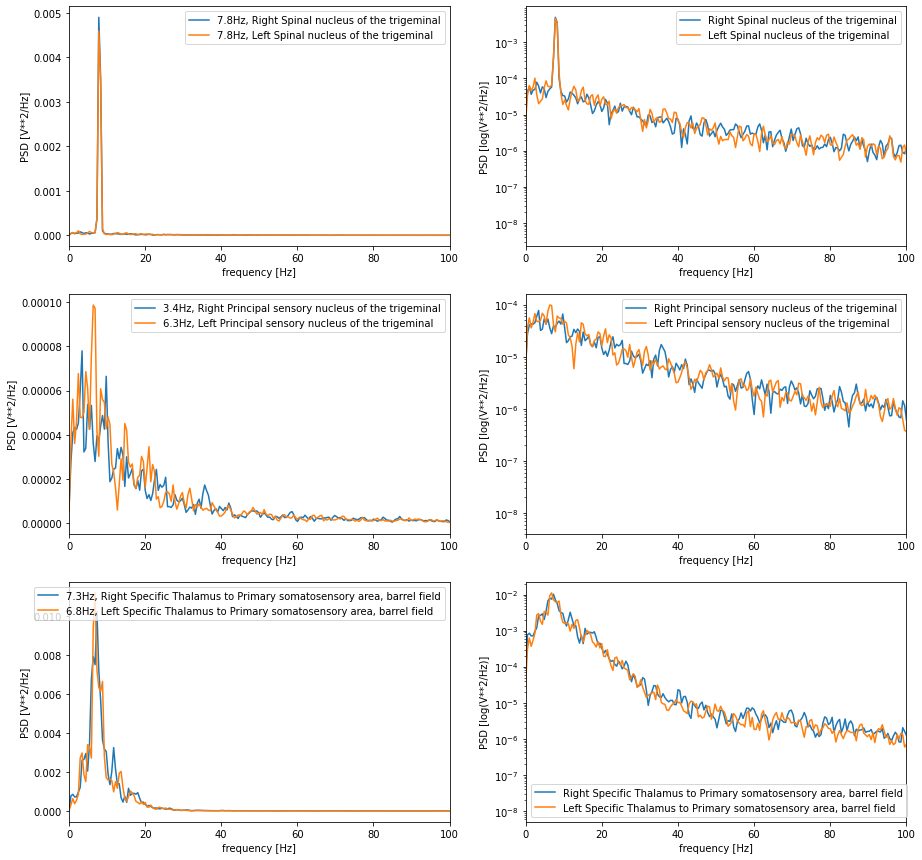

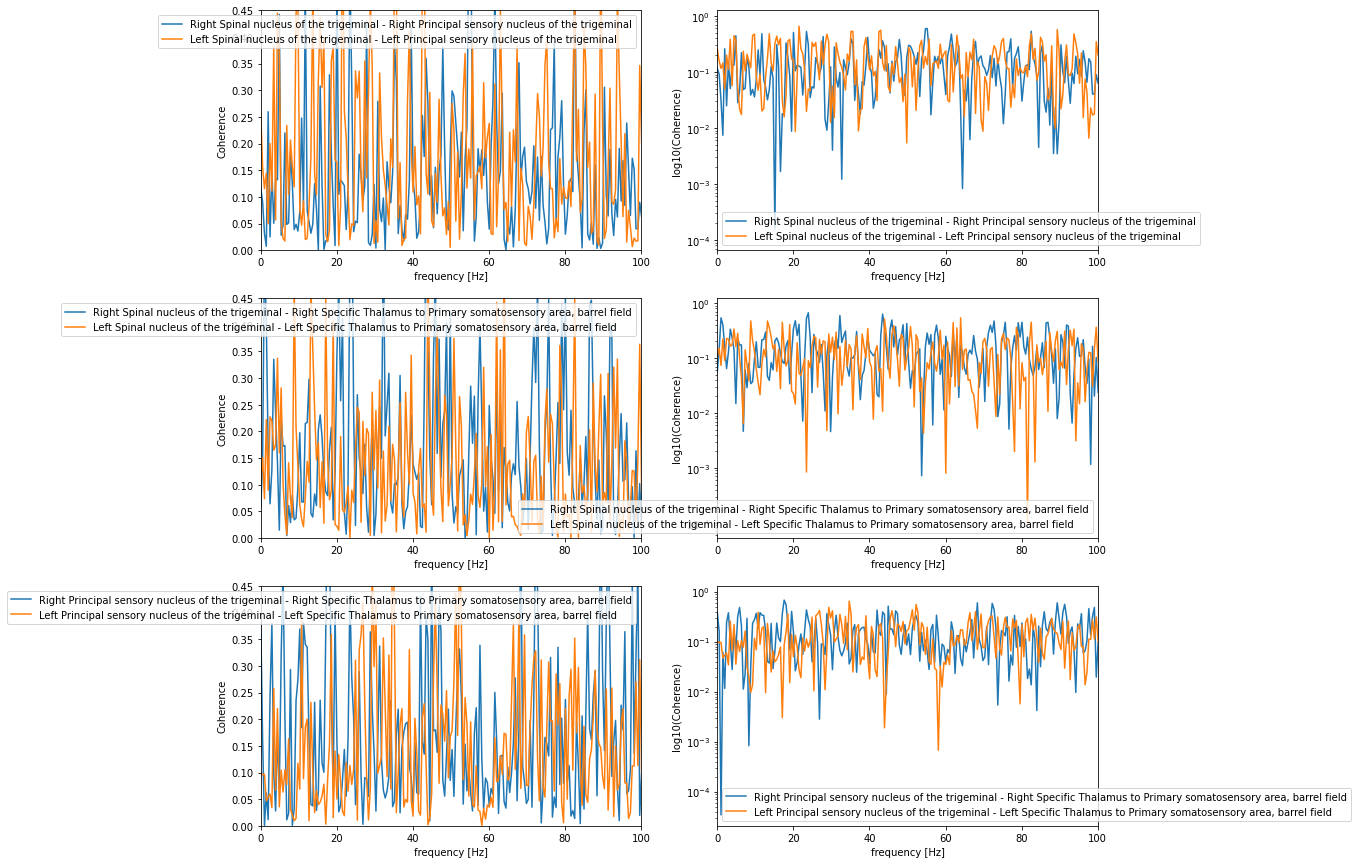

In [ ]:
source_ts = plot_tvb(transient, inds, results=results, source_ts=None, bold_ts=None,
                     simulator=simulator, plotter=plotter, config=config, write_files=write_files)[0]

In [ ]:
# Get spike events from NEST spike recorders
events = nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].get_events()

In [ ]:
# Compute approximate average rate of mossy fibers as:
# number_of_spikes / (number_of_neurons * time_length_in_ms) * 1000 (to convert to spikes/sec)

print("Last spike time: %g" % events['times'][-1])

for duration in range(1000, 10000, 1000):
    # duration = 1000.0  
    n_spikes = np.sum(events['times'] > events['times'][-1] - duration)
    print("Approximate mossy_fibers rate during the last %g ms = %g" % 
          (duration, n_spikes / 
                      (nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].number_of_neurons 
                       * duration) * 1000))



In [ ]:
# Node coupling values towards all regions for the last synchronization time:
node_coupling = simulator._loop_compute_node_coupling(simulator.current_step)
# min, mean, max values to get a feeling of scale:
print([node_coupling.min(), node_coupling.mean(), node_coupling.max()])
print(node_coupling[0][inds["ansilob"]])  # node_coupling[cvar, region_id, mode]
print(node_coupling[0][inds["oliv"]])

In [ ]:
# The last values in the TVB -> NEST transformer input buffer 
# (i.e., node couplines towards mossy fibers region nodes, i.e., towards Ansiform Lobule)
simulator.output_interfaces.interfaces[0].transformer.input_buffer
# simulator.input_interfaces.interfaces[0].transformer.input_buffer

In [ ]:
# Transformer output buffer rates, after scaling in the transformer with the scale_factor parameter
simulator.output_interfaces.interfaces[0].transformer.output_buffer
# simulator.input_interfaces.interfaces[0].transformer.output_buffer


In [ ]:
# The rates that were transferred to the corresponding spike generator device in NEST:
simulator.output_interfaces.interfaces[0].proxy.target[0].Get()
# simulator.input_interfaces.interfaces[0].proxy.source[0].Get()

In [ ]:
# !!!TAKES TOO MUCH TIME AND FREEZES KERNEL!!!
# plot_nest_results(nest_network, neuron_models, neuron_number, config)